In [1]:
#-*- coding:utf-8 -*-

import math
import numpy as np
import pylab as pl

In [2]:
 #数据集：每三个是一组分别是西瓜的编号，密度，含糖量
data = """
1,0.697,0.46,2,0.774,0.376,3,0.634,0.264,4,0.608,0.318,5,0.556,0.215,
6,0.403,0.237,7,0.481,0.149,8,0.437,0.211,9,0.666,0.091,10,0.243,0.267,
11,0.245,0.057,12,0.343,0.099,13,0.639,0.161,14,0.657,0.198,15,0.36,0.37,
16,0.593,0.042,17,0.719,0.103,18,0.359,0.188,19,0.339,0.241,20,0.282,0.257,
21,0.748,0.232,22,0.714,0.346,23,0.483,0.312,24,0.478,0.437,25,0.525,0.369,
26,0.751,0.489,27,0.532,0.472,28,0.473,0.376,29,0.725,0.445,30,0.446,0.459"""


In [3]:
#数据处理 dataset是30个样本（密度，含糖量）的列表
a = data.split(',')
dataset = [(float(a[i]), float(a[i+1])) for i in range(1, len(a)-1, 3)]

In [5]:
#计算欧几里得距离,a,b分别为两个元组
#math.pow(x,y)计算的是x的y次方
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2)+math.pow(a[1]-b[1], 2))

In [12]:
#算法模型
def DBSCAN(D, e, Minpts):
    #初始化核心对象集合T,聚类个数k,聚类集合C, 未访问集合P,
    T = set(); k = 0; C = []; P = set(D)
    for d in D:
        if len([ i for i in D if dist(d, i) <= e]) >= Minpts:
            T.add(d)
    #开始聚类
    while len(T):
        P_old = P
        o = list(T)[np.random.randint(0, len(T))]
        P = P - set(o)
        Q = []; Q.append(o)
        while len(Q):
            q = Q[0]
            Nq = [i for i in D if dist(q, i) <= e]
            if len(Nq) >= Minpts:
                S = P & set(Nq)
                Q += (list(S))
                P = P - S
            Q.remove(q)
        k += 1
        Ck = list(P_old - P)
        T = T - set(Ck)
        C.append(Ck)
    return C

In [13]:
#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper right')
    pl.show()

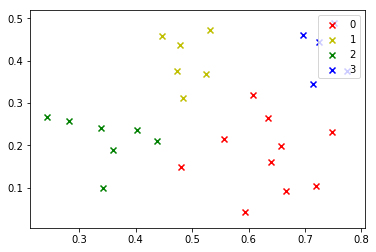

In [14]:
C = DBSCAN(dataset, 0.11, 5)
draw(C)